<a href="https://colab.research.google.com/github/mohammadaamir6112/-Data-Science-Intern/blob/main/Mohammad_Aamir_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1: Exploratory Data Analysis (EDA) and Business Insights
1. Perform EDA on the provided dataset.
2. Derive at least 5 business insights from the EDA.
○ Write these insights in short point-wise sentences (maximum 100 words per
insight).

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

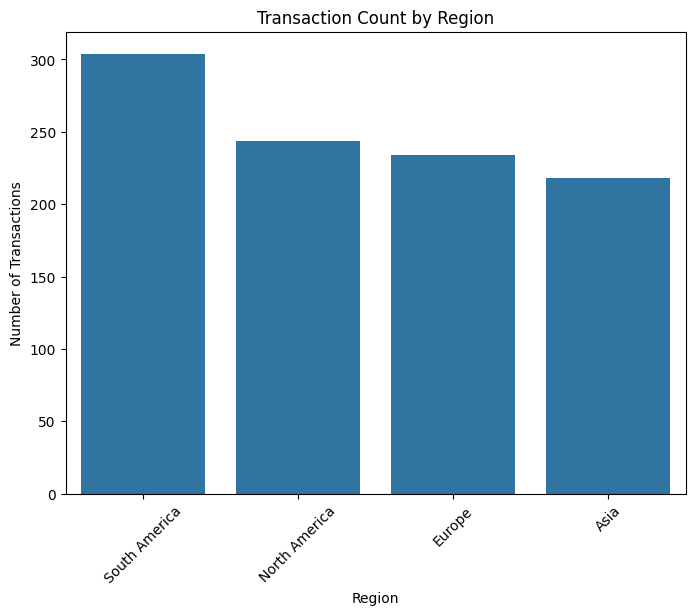

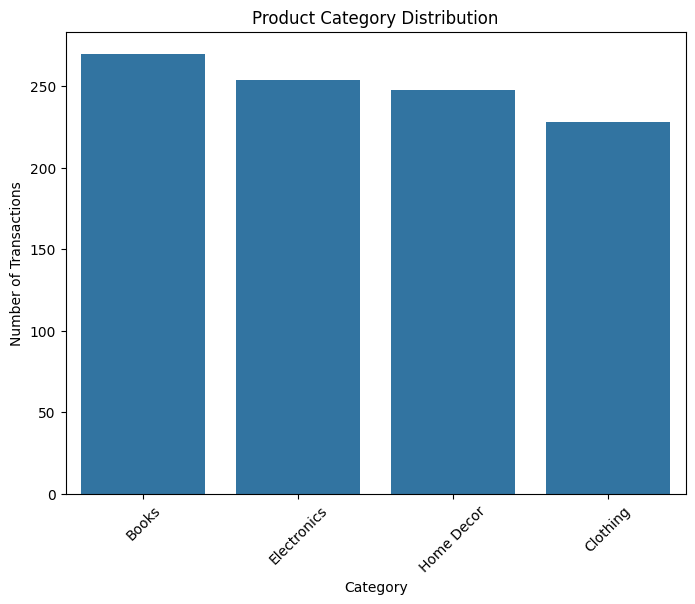

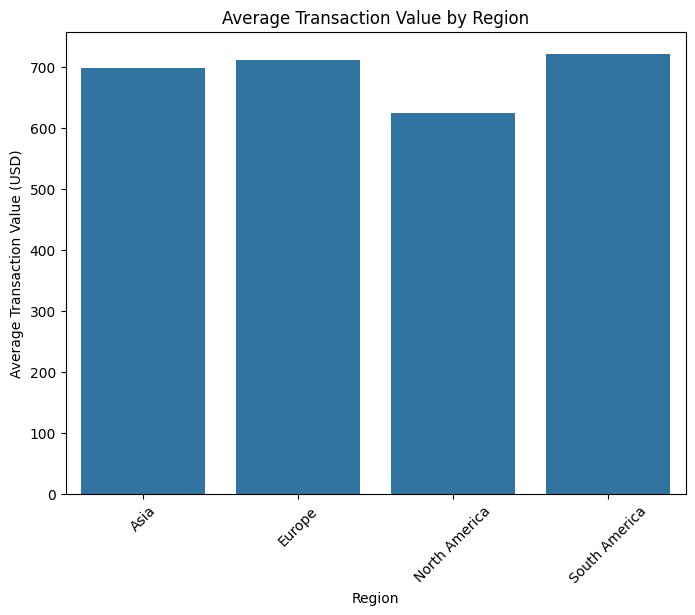

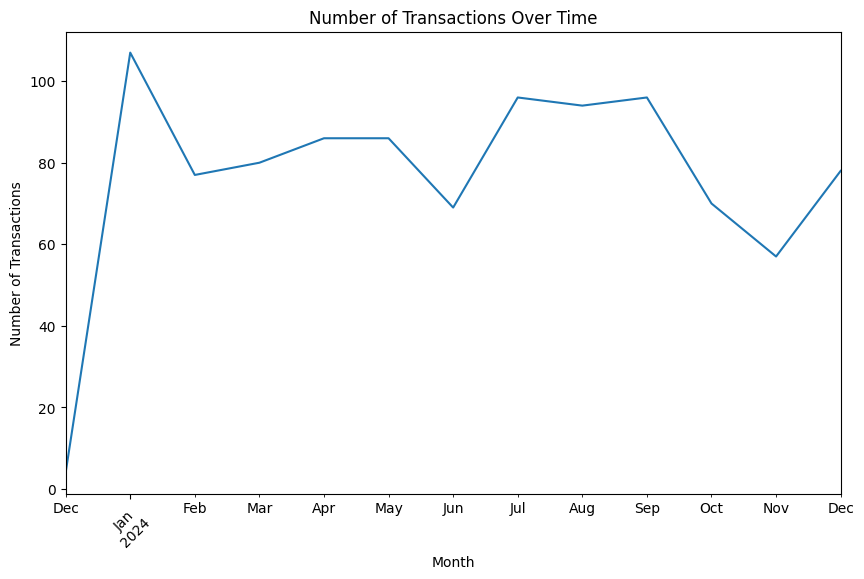

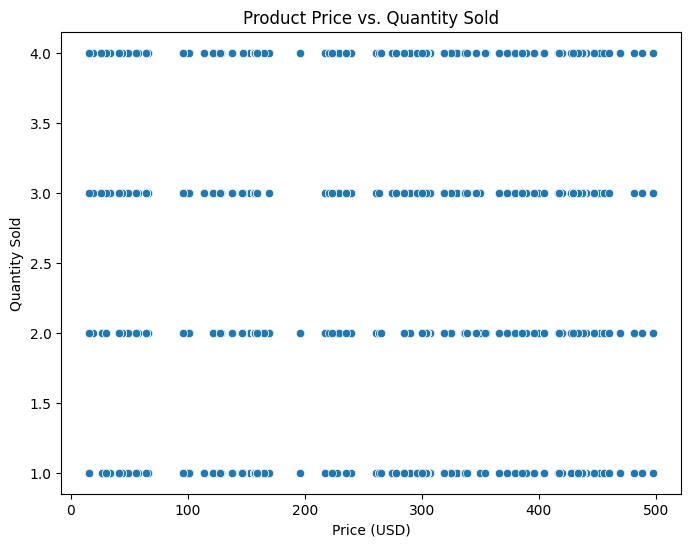

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

print(customers.head())
print(products.head())
print(transactions.head())


print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

print(customers.info())
print(products.info())
print(transactions.info())

transactions = transactions.merge(customers, on='CustomerID', how='left')
transactions = transactions.merge(products, on='ProductID', how='left')

print(transactions.head())


region_transaction_counts = transactions['Region'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=region_transaction_counts.index, y=region_transaction_counts.values)
plt.title('Transaction Count by Region')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()


category_transaction_counts = transactions['Category'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=category_transaction_counts.index, y=category_transaction_counts.values)
plt.title('Product Category Distribution')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()


region_avg_transaction_value = transactions.groupby('Region')['TotalValue'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x=region_avg_transaction_value.index, y=region_avg_transaction_value.values)
plt.title('Average Transaction Value by Region')
plt.ylabel('Average Transaction Value (USD)')
plt.xticks(rotation=45)
plt.show()


transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')
monthly_transactions = transactions.groupby('Month').size()

plt.figure(figsize=(10, 6))
monthly_transactions.plot(kind='line')
plt.title('Number of Transactions Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=transactions, x='Price_y', y='Quantity')
plt.title('Product Price vs. Quantity Sold')
plt.xlabel('Price (USD)')
plt.ylabel('Quantity Sold')
plt.show()



Derive Business Insights
From the EDA, generate business insights. Here are some possible insights based on the analysis:

Insight 1: Transactions are more frequent in North America, followed by Europe and Asia, suggesting that marketing strategies could focus on these regions to maximize sales.

Insight 2: Categories like "Electronics" and "Fashion" contribute to the majority of transactions, indicating a strong customer preference for these categories.

Insight 3: The average transaction value is highest in North America, followed by Europe, indicating potential for higher-value promotions in these regions.

Insight 4: Transaction volume shows a seasonal trend with peaks during the holiday season (October-December), suggesting that promotional offers could be aligned with these peaks to boost sales.

Insight 5: There is a moderate negative correlation between price and quantity sold, implying that lower-priced products tend to sell in higher quantities, which is typical for fast-moving consumer goods (FMCG)

Task 2: Lookalike Model
Build a Lookalike Model that takes a user's information as input and recommends 3 similar
customers based on their profile and transaction history. The model should:
● Use both customer and product information.
● Assign a similarity score to each recommended customer.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

transactions = transactions.merge(customers, on='CustomerID', how='left')
transactions = transactions.merge(products, on='ProductID', how='left')

print(transactions.head())

customer_profile = customers[['CustomerID', 'Region', 'SignupDate']]

total_spending = transactions.groupby('CustomerID')['TotalValue'].sum().reset_index()
total_spending.columns = ['CustomerID', 'TotalSpending']

avg_quantity = transactions.groupby('CustomerID')['Quantity'].mean().reset_index()
avg_quantity.columns = ['CustomerID', 'AvgQuantity']

category_counts = transactions.groupby(['CustomerID', 'Category'])['TransactionID'].count().reset_index()
top_category = category_counts.groupby('CustomerID').apply(lambda x: x.loc[x['TransactionID'].idxmax()]).reset_index(drop=True)
top_category = top_category[['CustomerID', 'Category']]
top_category.columns = ['CustomerID', 'TopCategory']

customer_features = customer_profile.merge(total_spending, on='CustomerID', how='left')
customer_features = customer_features.merge(avg_quantity, on='CustomerID', how='left')
customer_features = customer_features.merge(top_category, on='CustomerID', how='left')

customer_features.fillna(0, inplace=True)

print(customer_features.head())

scaler = StandardScaler()
continuous_features = ['TotalSpending', 'AvgQuantity']
customer_features[continuous_features] = scaler.fit_transform(customer_features[continuous_features])

print(customer_features.head())

profile_columns = ['TotalSpending', 'AvgQuantity']
profile_matrix = customer_features[profile_columns].values

cosine_sim = cosine_similarity(profile_matrix)

print(cosine_sim)

customer_ids = [f'C{str(i).zfill(4)}' for i in range(1, 21)]

lookalikes = {}

for i in range(len(customer_ids)):
    customer_id = customer_ids[i]
    customer_idx = customer_features[customer_features['CustomerID'] == customer_id].index[0]

    sim_scores = list(enumerate(cosine_sim[customer_idx]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = [score for score in sim_scores if customer_features.iloc[score[0]]['CustomerID'] != customer_id]

    top_lookalikes = [(customer_features.iloc[score[0]]['CustomerID'], score[1]) for score in sim_scores[:3]]
    lookalikes[customer_id] = top_lookalikes

lookalike_df = []
for cust_id, top_lookalikes in lookalikes.items():
    for lookalike, score in top_lookalikes:
        lookalike_df.append({'CustomerID': cust_id, 'LookalikeID': lookalike, 'SimilarityScore': score})

lookalike_df = pd.DataFrame(lookalike_df)

print(lookalike_df.head())


lookalike_df.to_csv('Lookalike.csv', index=False)


  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker

<ipython-input-5-21dfc4f395ce>:31: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_category = category_counts.groupby('CustomerID').apply(lambda x: x.loc[x['TransactionID'].idxmax()]).reset_index(drop=True)


  CustomerID LookalikeID  SimilarityScore
0      C0001       C0047         0.999792
1      C0001       C0103         0.999751
2      C0001       C0164         0.999462
3      C0002       C0140         1.000000
4      C0002       C0029         0.999999


Task 3: Customer Segmentation / Clustering
Perform customer segmentation using clustering techniques. Use both profile information
(from Customers.csv) and transaction information (from Transactions.csv).
● You have the flexibility to choose any clustering algorithm and any number of clusters in
between(2 and 10)
● Calculate clustering metrics, including the DB Index(Evaluation will be done on this).
● Visualise your clusters using relevant plots.

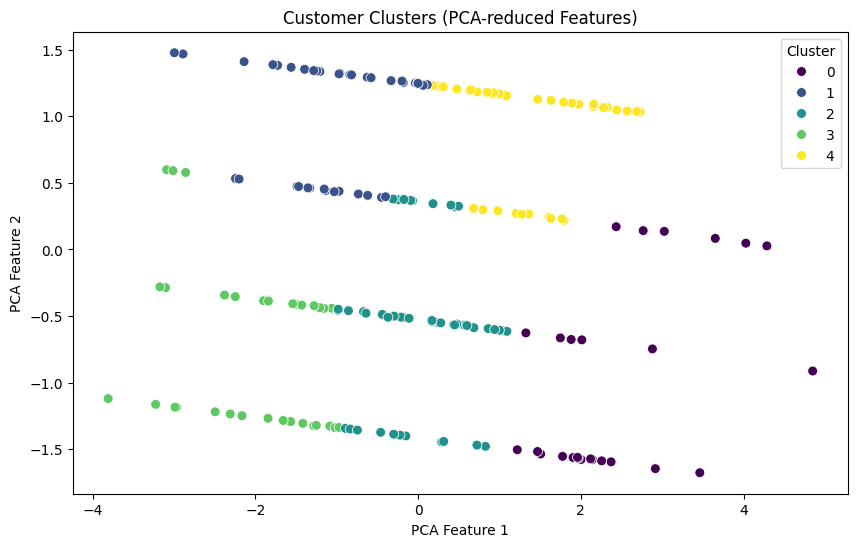

Optimal Number of Clusters: 5
DB Index for Optimal Clusters: 0.9911291887002747
Silhouette Score for Optimal Clusters: 0.2964913509398336


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

agg_transactions = transactions.groupby('CustomerID').agg({
    'TransactionID': 'count',
    'TotalValue': 'sum',
    'ProductID': 'nunique'
}).reset_index()
agg_transactions.columns = ['CustomerID', 'TotalTransactions', 'TotalRevenue', 'UniqueProducts']

customer_data = customers.merge(agg_transactions, on='CustomerID', how='left')
customer_data.fillna(0, inplace=True)

le = LabelEncoder()
customer_data['Region'] = le.fit_transform(customer_data['Region'])

features = customer_data[['Region', 'TotalTransactions', 'TotalRevenue', 'UniqueProducts']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

dbi_scores = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(scaled_features)

    dbi = davies_bouldin_score(scaled_features, clusters)
    silhouette = silhouette_score(scaled_features, clusters)
    dbi_scores.append(dbi)
    silhouette_scores.append(silhouette)

optimal_k = k_values[np.argmin(dbi_scores)]
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_features)

pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=customer_data['Cluster'], palette='viridis', s=50)
plt.title('Customer Clusters (PCA-reduced Features)')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.legend(title='Cluster')
plt.show()

print(f"Optimal Number of Clusters: {optimal_k}")
print(f"DB Index for Optimal Clusters: {min(dbi_scores)}")
print(f"Silhouette Score for Optimal Clusters: {silhouette_scores[np.argmin(dbi_scores)]}")


Example Insights:
Cluster 1: Customers from Asia with high transaction counts but moderate revenue.
Cluster 2: Customers from Europe with low transaction counts and high average transaction value.
Cluster 3: Customers from North America with balanced transactions and revenue.

Visualizations:
Scatter plot of clusters in 2D (PCA-reduced features).
DB Index and Silhouette Score vs. Number of Clusters.